<a href="https://colab.research.google.com/github/vishwanaik15/DataMining_Project/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import os
import sys
import re
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection,preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression,Ridge,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score
import time
from time import sleep
#nltk toolkit used for stopwords removing
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
os.chdir('/content/gdrive/My Drive/Data Mining/')

In [47]:
dataset =  pd.read_csv("data.csv",encoding='latin1',low_memory=False)
print("Length of review data: ",len(dataset))
dataset.head()

Length of review data:  1415138


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [48]:
# counting total NaN values in each column
dataset.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

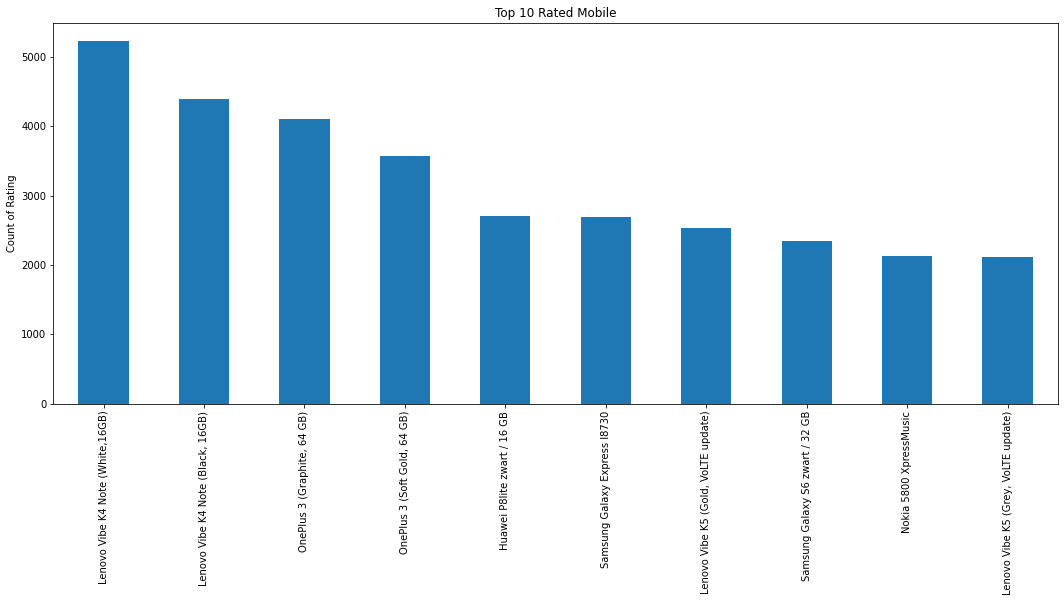

In [49]:
# this chart represents top 50 rated words from dataframe 
plt.figure(figsize=(18, 7))
dataset['product'].value_counts()[:10].plot(kind='bar')
plt.ylabel('Count of Rating')
plt.title('Top 10 Rated Mobile')
plt.show()

In [50]:
dataset = dataset[['extract','score']]
#removing missing values from dataframe
dataset.dropna(inplace=True)
print("Length of dataset after removing missing values: ",len(dataset))
print('')
dataset.head()

Length of dataset after removing missing values:  1332704



,extract,score
0,As a diehard Samsung fan who has had every Sam...,10
1,Love the phone. the phone is sleek and smooth ...,10
2,Adequate feel. Nice heft. Processor's still sl...,6
3,Never disappointed. One of the reasons I've be...,9.2
4,I've now found that i'm in a group of people t...,4


In [51]:
#tokenization of comments column and removing punctuation
from nltk.tokenize import RegexpTokenizer
#this regular expression tokenize words in comma separated form
tokenizer = RegexpTokenizer(r'\w+')
dataset['extract'] = dataset['extract'].apply(lambda x: tokenizer.tokenize(x.lower()))
dataset.head()

,extract,score
0,"[as, a, diehard, samsung, fan, who, has, had, ...",10
1,"[love, the, phone, the, phone, is, sleek, and,...",10
2,"[adequate, feel, nice, heft, processor, s, sti...",6
3,"[never, disappointed, one, of, the, reasons, i...",9.2
4,"[i, ve, now, found, that, i, m, in, a, group, ...",4


In [52]:
#removing stop words from comments 
stops = set(stopwords.words("english"))
dataset['extract'] = dataset['extract'].apply(lambda x: [item for item in x if item not in stops])
dataset.head(10)

,extract,score
0,"[diehard, samsung, fan, every, samsung, phone,...",10
1,"[love, phone, phone, sleek, smooth, beautiful,...",10
2,"[adequate, feel, nice, heft, processor, still,...",6
3,"[never, disappointed, one, reasons, long, sams...",9.2
4,"[found, group, people, carried, phone, pocket,...",4
5,"[type, person, never, would, completely, sold,...",10
6,"[way, samsung, s8, phone, operates, cumbersome...",4
7,"[bought, phone, excited, use, agree, reviews, ...",6
8,"[extremely, advanced, truly, smart, phone, gre...",6
9,"[great, phone, phenomenal, camera, hard, get, ...",8


In [53]:
#joining all tokens to proceed further for data modeling
dataset['extract'] = dataset['extract'].apply(' '.join)

In [54]:
dataset.head()

,extract,score
0,diehard samsung fan every samsung phone since ...,10
1,love phone phone sleek smooth beautiful highly...,10
2,adequate feel nice heft processor still sluggi...,6
3,never disappointed one reasons long samsung pr...,9.2
4,found group people carried phone pocket withou...,4


In [55]:
def extract_data(dataset):
    x = pd.read_csv(dataset,engine='python')
    x = x[x['lang'] == 'en']
    x.reset_index(inplace=True)
    return x[['score','extract','product']]
dataset = extract_data('data.csv')

In [56]:
dataset.dropna(inplace=True)
np.unique(dataset.score)

array(['1', '1.2', '1.3', '1.4', '1.6', '1.7', '1.8', '10', '2', '2.2',
       '2.3', '2.4', '2.6', '2.7', '2.8', '3', '3.2', '3.3', '3.4', '3.6',
       '3.7', '3.8', '4', '4.2', '4.3', '4.4', '4.6', '4.7', '4.8', '5',
       '5.2', '5.3', '5.4', '5.6', '5.7', '5.8', '5.9', '6', '6.2', '6.3',
       '6.4', '6.6', '6.7', '6.8', '7', '7.1', '7.2', '7.3', '7.4', '7.5',
       '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3', '8.4', '8.5',
       '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2', '9.3', '9.4', '9.5',
       '9.6', '9.7', '9.8'], dtype=object)

In [57]:
def apply_trans(p):
    if p >= 1. and p < 2.:
        return 1
    elif p >= 2. and p < 3.:
        return 2
    elif p >= 3. and p < 4.:
        return 3
    elif p >= 4. and p < 5.:
        return 4
    elif p >= 5. and p < 6.:
        return 5
    elif p >= 6. and p < 7.:
        return 6
    elif p >= 7. and p < 8.:
        return 7
    elif p >= 8. and p < 9.:
        return 8
    elif p >= 9. and p < 10.:
        return 9
    else:
        return 10
        
dataset['score'] = dataset['score'].apply(lambda x :apply_trans(float(x)))
dataset.reset_index(inplace=True)

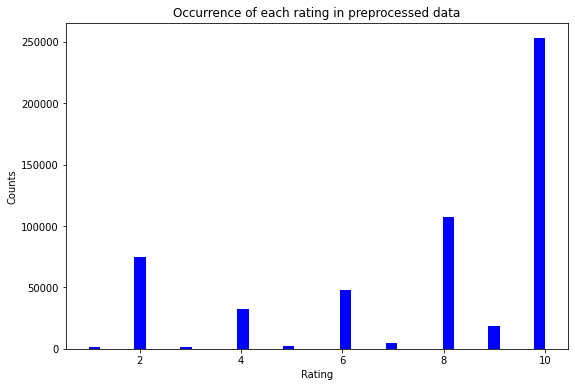

In [58]:
#histogram representing how much time each ratings occur
fig = plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(dataset.score, bins=40, facecolor='blue',alpha = 1)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Occurrence of each rating in preprocessed data')
fig.patch.set_facecolor('white')
plt.show()
# width of bars are defined using value of bin

In [59]:
#average value of all the ratings 
print("Average rating: ",dataset['score'].mean())
#median value of ratings values
print("Median value: ",dataset['score'].median())

Average rating:  7.665067910469653
Median value:  8.0


In [60]:
dataset.head()

,index,score,extract,product
0,0,10,As a diehard Samsung fan who has had every Sam...,Samsung Galaxy S8
1,1,10,Love the phone. the phone is sleek and smooth ...,Samsung Galaxy S8
2,2,6,Adequate feel. Nice heft. Processor's still sl...,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,3,9,Never disappointed. One of the reasons I've be...,Samsung Galaxy S8 64GB (AT&T)
4,4,4,I've now found that i'm in a group of people t...,Samsung Galaxy S8


In [61]:
#selecting chunk of data (if you want) from whole dataframe for further model training and testing
new_dataset = dataset

In [62]:
new_dataset['score'] =np.round(new_dataset['score'])

In [63]:
#occurance of each rating in the column
new_dataset['score'].value_counts()

10    253010
8     107438
2      75124
6      48205
4      32199
9      18852
7       4846
5       2663
1       1666
3       1421
Name: score, dtype: int64

In [64]:
#splitting dataset in to four parts randomly
X_train, X_test, y_train, y_test = train_test_split(new_dataset['extract'], new_dataset['score'], test_size=0.2) # 80% training and 20% test

In [65]:
#vectorizing our data
#Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
transformer = TfidfTransformer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train_counts = transformer.fit_transform(X_train)
X_test_counts = transformer.fit_transform(X_test)

In [66]:
model_mNB = MultinomialNB().fit(X_train_counts, y_train.astype('int'))
y_predicted_mNB = model_mNB.predict(X_test_counts)

accuracy = accuracy_score(y_test.astype('int'),y_predicted_mNB) * float(100)
accuracy_mNB = str(accuracy)
print('Testing Accuracy on multinomial naive bayes model is: '+accuracy_mNB+' %')

Testing Accuracy on multinomial naive bayes model is: 53.62148783059082 %


Confusion matrix for Multinomial Naive Bayes classifier:



Text(842.9999999999998, 0.5, 'Predicted rating')

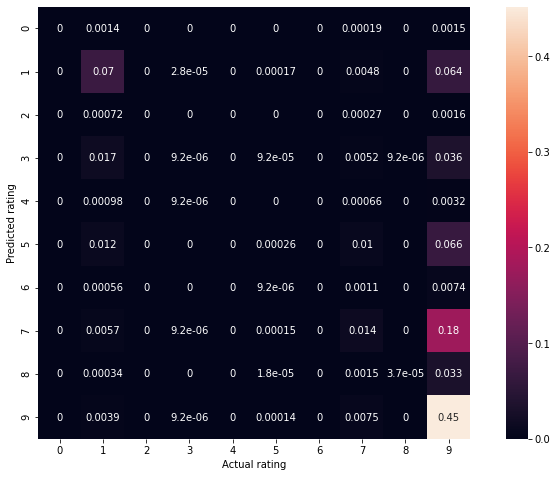

In [67]:
#confusion matrix for what output we got
print("Confusion matrix for Multinomial Naive Bayes classifier:\n")
fig= plt.figure(figsize=(10,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test.astype('int'), y_predicted_mNB)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True)
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [68]:
model_ridge_class = RidgeClassifier().fit(X_train_counts, y_train.astype('int'))
y_predicted = model_ridge_class.predict(X_test_counts)
y_predicted_ridge_class = np.round(y_predicted)
accuracy = accuracy_score(y_test,y_predicted_ridge_class) * float(100)
ridge_class_accuracy = str(accuracy)
print('Testing Accuracy on ridge classifier model is: '+ridge_class_accuracy+' %')

Testing Accuracy on ridge classifier model is: 57.44877847550076 %


Confusion matrix for Ridge Classifier:



Text(842.9999999999998, 0.5, 'Predicted rating')

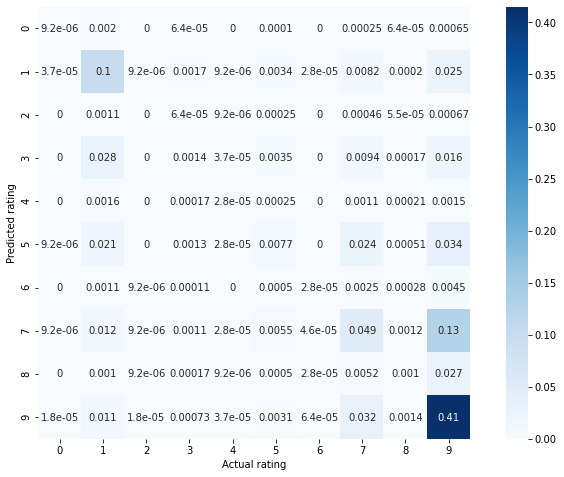

In [69]:
print("Confusion matrix for Ridge Classifier:\n")
fig= plt.figure(figsize=(10,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test.astype('int'), y_predicted_ridge_class)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="Blues")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [70]:
#well this is fun part. 
#input your string at smt value and get rating for that.
#here you can test rating for your desired review
smt = "Phone with not so good review"
smt=[smt]
smt = vectorizer.transform(smt)
smt = transformer.fit_transform(smt)
prediction = np.round(model_ridge_class.predict(smt))
print(prediction)

[2]


In [71]:
samall_dataset = new_dataset.sample(n=10000)
samall_dataset['rating'] =np.round(samall_dataset['score'])
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(samall_dataset['extract'], samall_dataset['score'], test_size=0.2) # 80% training and 20% test

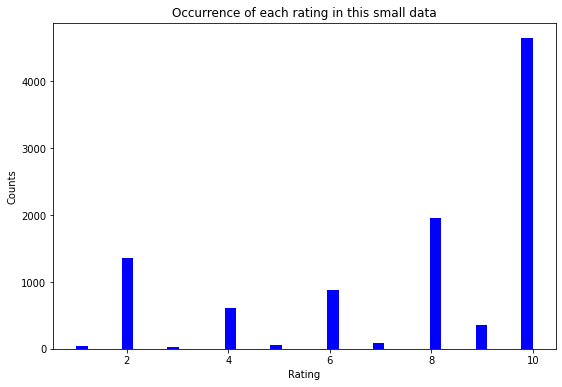

In [72]:
#histogram representing how much time each ratings occur
fig = plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(samall_dataset.score, bins=40, facecolor='blue',alpha = 1)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Occurrence of each rating in this small data')
fig.patch.set_facecolor('white')
plt.show()
# width of bars are defined using value of bin

In [73]:
#vectorizing our data
vect = TfidfVectorizer()
trans = TfidfTransformer()

X_train_small = vect.fit_transform(X_train_small)
X_test_small = vect.transform(X_test_small)

X_train_small = trans.fit_transform(X_train_small)
X_test_small = trans.fit_transform(X_test_small)
model_SVM = Pipeline([
    ('Tfidf_vectorizer', TfidfVectorizer()), 
    ('Tfidf_transformer',  TfidfTransformer()), 
    ('classifier', SVC(kernel="linear"))])  #this kernel=linear argument states that decision boundary to separate data is straight line

In [75]:
model_SVC = SVC(kernel="linear",probability=True).fit(X_train_small,y_train_small.astype('int'))
#this kernel=linear argument states that decision boundary to separate data is straight line
y_predicted_SVC = model_SVC.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_SVC) * float(100)
accuracy_svc = str(accuracy)
print('Testing Accuracy is: '+accuracy_svc+' %')

Testing Accuracy is: 56.15 %


Confusion matrix for Support vector machine:



Text(583.8, 0.5, 'Predicted rating')

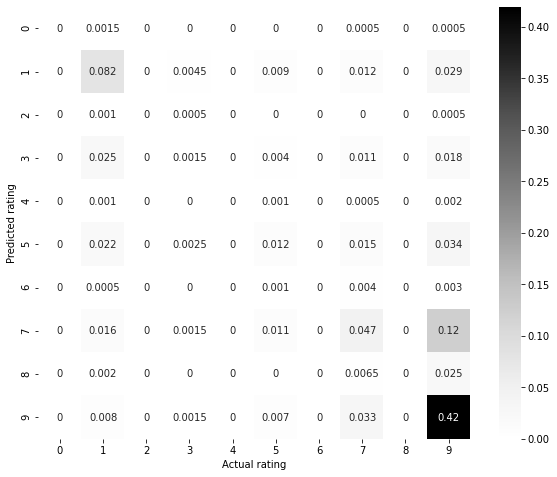

In [76]:
print("Confusion matrix for Support vector machine:\n")
fig= plt.figure(figsize=(8,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_SVC)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="Greys")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [77]:
model_linear_SVC = LinearSVC().fit(X_train_small,y_train_small.astype('int'))
y_predicted_linear_SVC = model_linear_SVC.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_linear_SVC) * float(100)
accuracy_linear_svc = str(accuracy)
print('Testing Accuracy is: '+accuracy_linear_svc+' %')

Testing Accuracy is: 51.1 %


Confusion matrix for Linear Support vector machine:



Text(583.8, 0.5, 'Predicted rating')

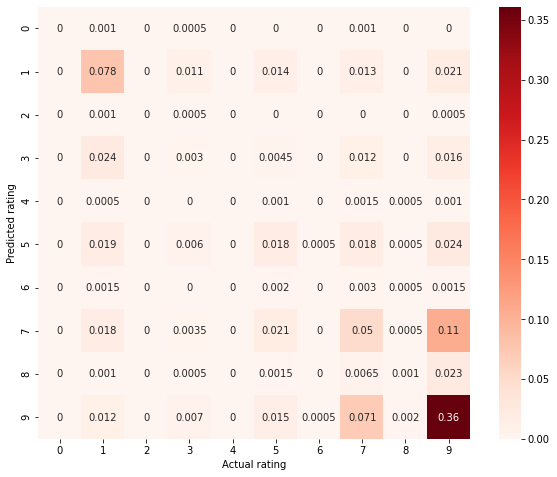

In [78]:
print("Confusion matrix for Linear Support vector machine:\n")
fig= plt.figure(figsize=(8,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_linear_SVC)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="Reds")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [79]:
from sklearn.linear_model import LogisticRegression,Ridge,RidgeClassifier

In [80]:
model_Logistic_Regression = LogisticRegression(max_iter=20000).fit(X_train_small,y_train_small.astype('int'))
y_predicted_log_reg = model_Logistic_Regression.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_log_reg) * float(100)
accuracy_log_reg = str(accuracy)
print('Testing Accuracy is: '+accuracy_log_reg+' %')

Testing Accuracy is: 56.8 %


Confusion matrix for Logistic regression:



Text(583.8, 0.5, 'Predicted rating')

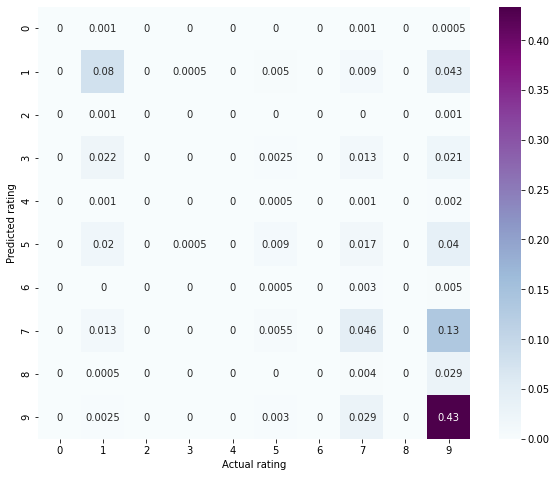

In [81]:
print("Confusion matrix for Logistic regression:\n")
fig= plt.figure(figsize=(8,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_log_reg)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="BuPu")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [82]:
model_kNN = KNeighborsClassifier(n_neighbors=10).fit(X_train_small,y_train_small.astype('int'))
y_predicted_knn = model_kNN.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_knn) * float(100)
accuracy_knn = str(accuracy)
print('Testing Accuracy is: '+accuracy_knn+' %')

Testing Accuracy is: 51.24999999999999 %


Confusion matrix for kNN:



Text(583.8, 0.5, 'Predicted rating')

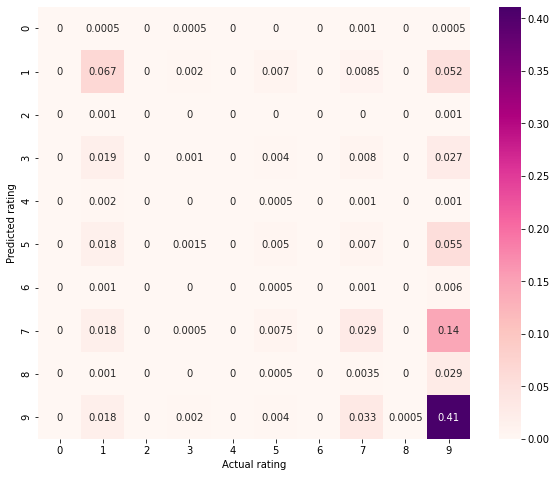

In [83]:
print("Confusion matrix for kNN:\n")
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_knn)
fig= plt.figure(figsize=(8,6))
ax = fig.add_axes([1,1,1,1])
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="RdPu")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [84]:
from sklearn.ensemble import VotingClassifier
Ensemble = VotingClassifier(estimators=[('Linear SVC',model_SVC),('knn',model_kNN),('logistic',model_Logistic_Regression)],voting='soft',weights=[2,1,3])
model_ensemble = Ensemble.fit(X_train_small,y_train_small.astype('int'))
ensemble_predicted = model_ensemble.predict(X_test_small)
accuracy_ensemble = accuracy_score(ensemble_predicted,y_test_small.astype('int'))* float(100)
accuracy_ensemble = str(accuracy_ensemble)
print('Testing Accuracy is: '+accuracy_ensemble+' %')

Testing Accuracy is: 56.45 %


Confusion matrix for Ensemble methos for given estimators:



Text(583.8, 0.5, 'Predicted rating')

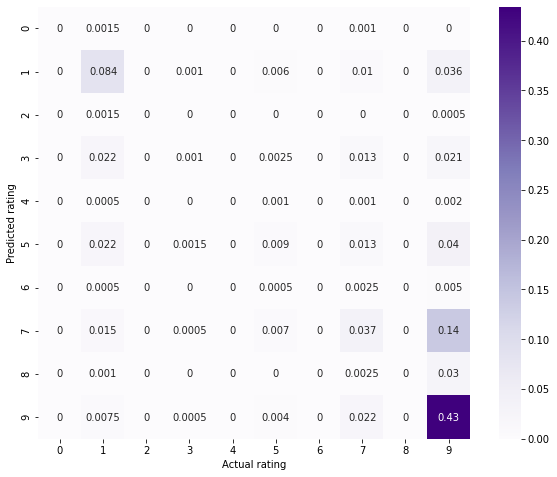

In [85]:
print("Confusion matrix for Ensemble methos for given estimators:\n")
matrix = confusion_matrix(y_test_small.astype('int'), ensemble_predicted)
fig= plt.figure(figsize=(8,6))
ax = fig.add_axes([1,1,1,1])
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="Purples")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

In [86]:
acc1 = float(accuracy_mNB)
acc2 = float(ridge_class_accuracy)
acc3 = float(accuracy_svc)
acc4 = float(accuracy_linear_svc)
acc5 = float(accuracy_log_reg)
acc6 = float(accuracy_knn)

In [87]:
acc=[]
acc.append(acc1)
acc.append(acc2)
acc.append(acc3)
acc.append(acc4)
acc.append(acc5)
acc.append(acc6)

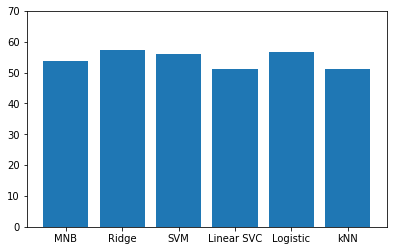

In [93]:
fig = plt.figure(figsize=(5,3))
labels = ['MNB','Ridge','SVM','Linear SVC','Logistic','kNN']

ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels,acc)
plt.ylim(0,70)
plt.show()

In [94]:
def redge_acc(smt):
  smt=[smt] #converting text into array for code compatibility
  smt = vectorizer.transform(smt) #vectorize data
  smt = transformer.fit_transform(smt) #transforming input string vector
  prediction = np.round(model_ridge_class.predict(smt)) #using ridge classifier trained model to predict rating for what user has gave input
  return prediction

In [96]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
from sklearn.externals import joblib
joblib.dump(model_ridge_class,'model_ridge_class.sav')
joblib.dump(model_mNB,'model_mNB.sav')
joblib.dump(model_SVC,'model_SVC.sav')
joblib.dump(model_linear_SVC,'model_linear_svc.sav')
joblib.dump(model_Logistic_Regression,'model_logistic_regression.sav')
joblib.dump(model_kNN,'model_knn.sav')
joblib.dump(model_ensemble,'model_ensemble.sav')
joblib.dump(vectorizer,'vectorizer.sav')
joblib.dump(transformer,'transformer.sav')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['transformer.sav']